In [1]:
### Central Limit Theorem Visualized

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

What is CLT?

If we randomly take a large sample size from a population, the mean of all samples will be roughly equal to the population mean, and the distribution of the means will be approximately normally distributed.

Why CLT?
1. the population is too large to be entirely estimated.
2. the population doesn't have a clear distribtuion and we still want to know its mean.

In [3]:
# build Uniform distribution as population
def get_dice_throw(face=6):
    return round(np.random.uniform(low=0.5, high=face + 0.5, size=None), 0)

s = [1, 2, 3, 4, 5, 6]  # sample space for a die roll

# create a random choice of two die rolls with replacement.
rc1 = random.choices(s, k=10)
# or
rc2 = [get_dice_throw() for _ in range(10)]

# sum up the value of these two dices and calculate their mean
two_dice = [x + y for x, y in zip(rc1, rc2)]
mean_throws = np.mean(two_dice)


print("First Dice : ", rc1)
print("Second Dice : ", rc2)
print("Sum of 2 Dice : ", two_dice)
print("Mean of 10 throws of 2 dice : ", mean_throws)

First Dice :  [5, 1, 5, 5, 4, 1, 1, 4, 5, 3]
Second Dice :  [1.0, 6.0, 3.0, 4.0, 2.0, 2.0, 6.0, 6.0, 6.0, 6.0]
Sum of 2 Dice :  [6.0, 7.0, 8.0, 9.0, 6.0, 3.0, 7.0, 10.0, 11.0, 9.0]
Mean of 10 throws of 2 dice :  7.6


#### NOTE:
* The parameter k is the equivalent of n, where n is the number of samples drawn for each experiment. 
* So for k=30, we are doing 30 throws of 2 dice, and finding the average of those 30 throws to conclude 1 experiment.
* We then need to perform many such experiments, and the mean of the throws of the several experiments converge to a normal distribution according to CLT.

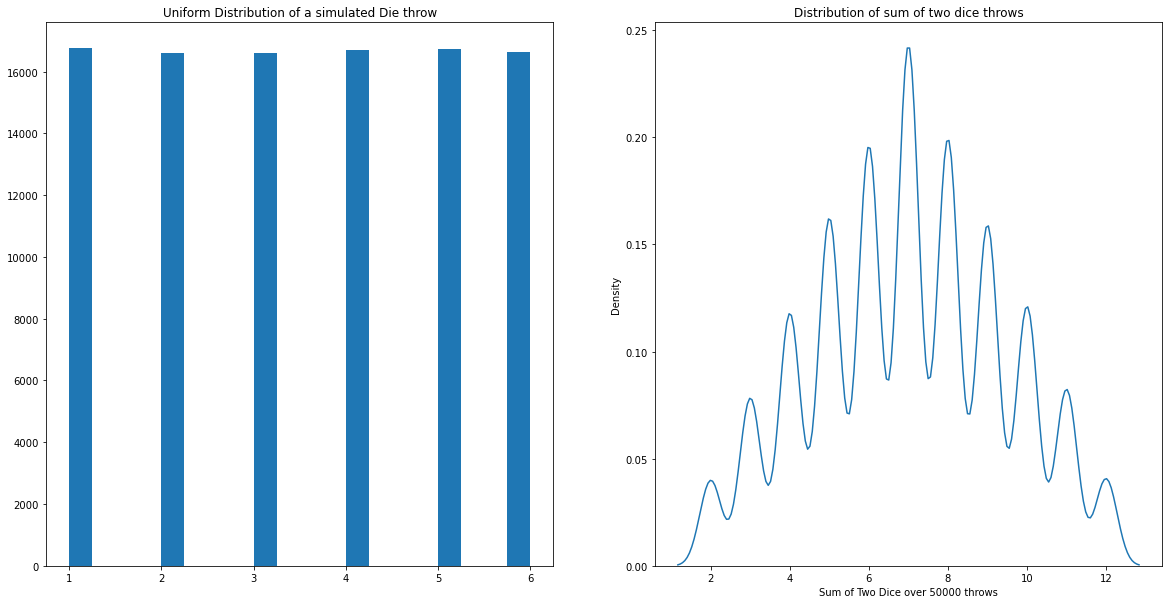

In [4]:
# build Uniform distribution as population
s_plot = [get_dice_throw() for i in range(100000)]

# create a random choice of two die rolls with replacement.
rc1 = [get_dice_throw() for i in range(50000)]
rc2 = [get_dice_throw() for i in range(50000)]


two_dice = [x + y for x, y in zip(rc1, rc2)]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Uniform Distribution of a simulated Die throw")
ax[1].set_title("Distribution of sum of two dice throws")
ax[0].hist(s_plot, 20)  # plot histogram of single die throws
sns.kdeplot(two_dice, ax=ax[1])  # plot density of sum of two dice thrown 50000 times
ax[1].set_xlabel("Sum of Two Dice over 50000 throws")
plt.show()

In [5]:
num_of_faces = 6  # change this for many sided dice
num_of_experiments = [
    100,
    500,
    1000,
    10000,
    50000,
    100000,
]  # do the experiment multiple times

/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

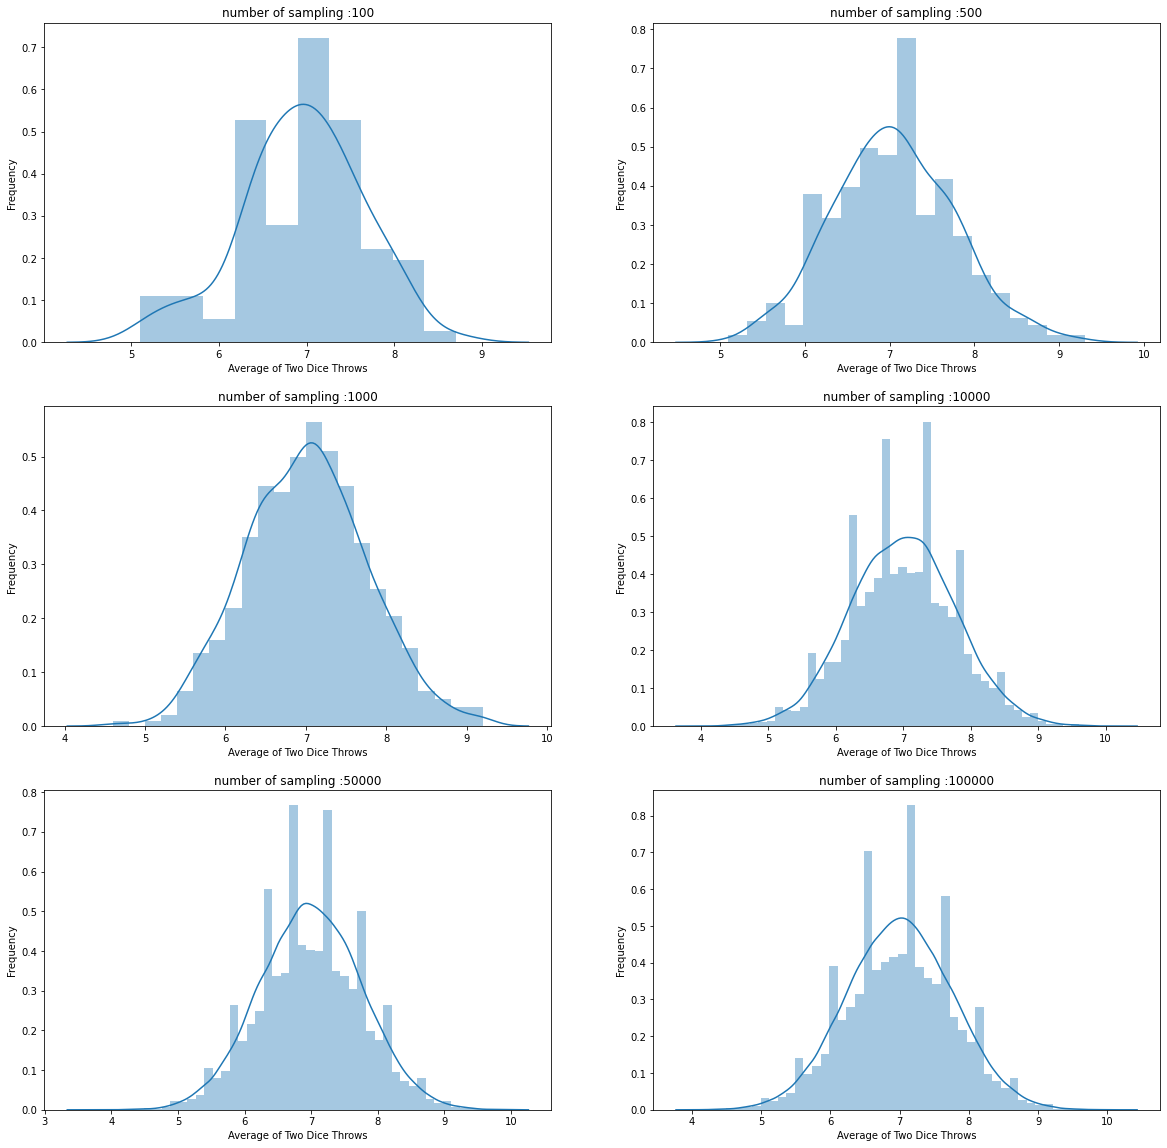

In [6]:
# # number of throws
num_throws_per_experiment = 10

#### Note: Show that Increasing Number of Throws (increasing sample size n) converge to normality faster

# list to keep track of all experiments
meansample = []
# for each number of experiments
for i in num_of_experiments:

    # collect mean of each sample
    eachmeansample = []

    # for each sampling
    for j in range(0, i):

        # create a random choice of two die rolls with replacement.
        rc1 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        rc2 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        two_dice = [x + y for x, y in zip(rc1, rc2)]

        # collect mean of each sample
        eachmeansample.append(np.mean(two_dice))

    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        # ax[i, j].hist(meansample[n], density=True)
        sns.distplot(meansample[n], kde=True, ax=ax[i, j])
        ax[i, j].set_title(label="number of sampling :" + str(num_of_experiments[n]))
        ax[i, j].set_xlabel("Average of Two Dice Throws")
        ax[i, j].set_ylabel("Frequency")
        n += 1

/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

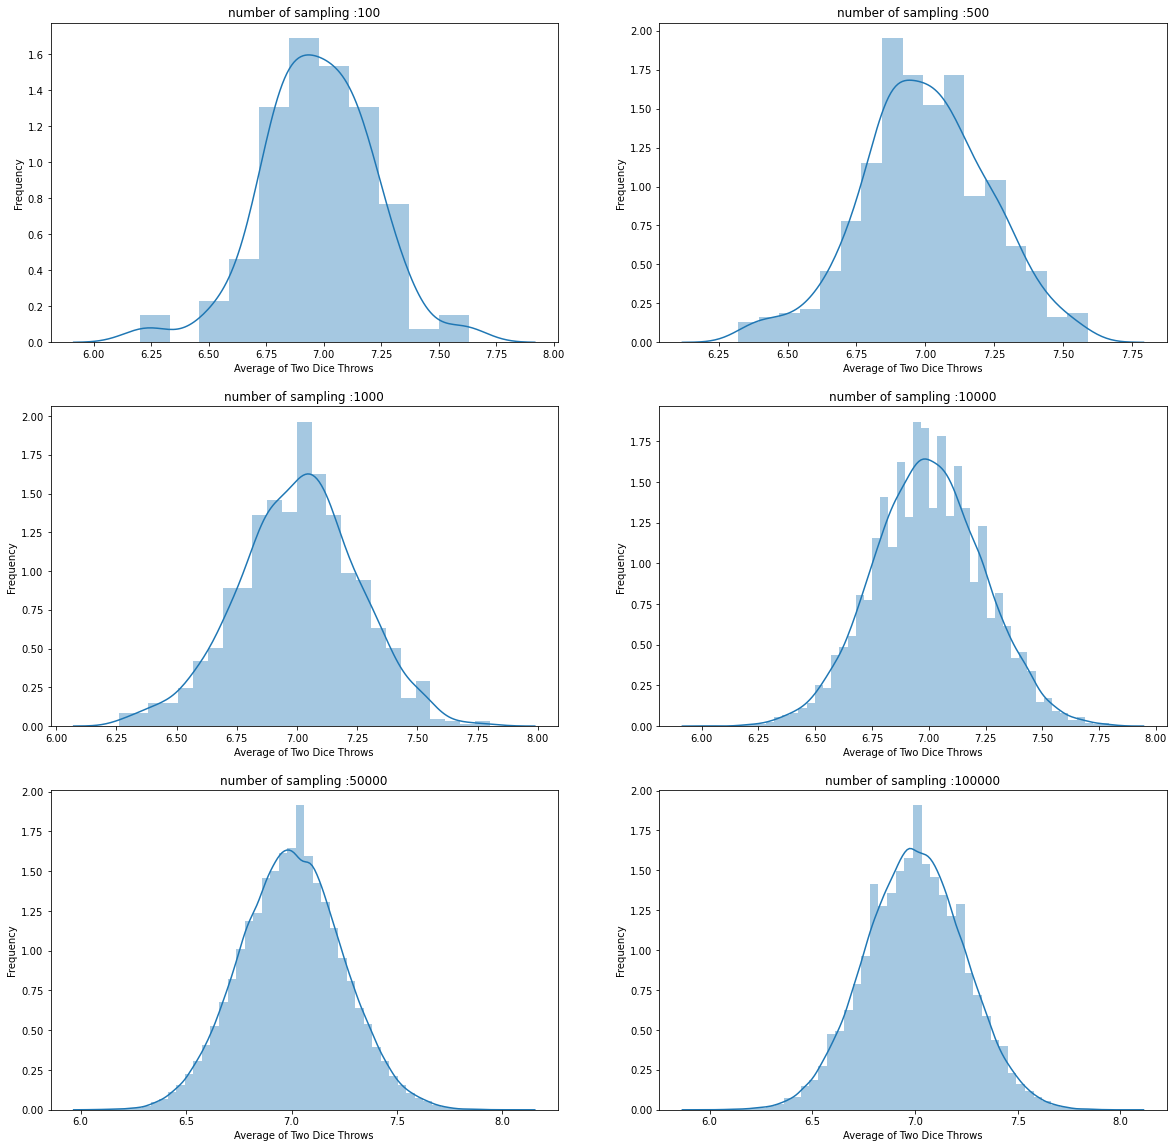

In [7]:
# number of throws
num_throws_per_experiment = 100

#### Note: Show that Increasing Number of Throws (increasing sample size n) converge to normality faster

# list to keep track of all experiments
meansample = []
# for each number of experiments
for i in num_of_experiments:

    # collect mean of each sample
    eachmeansample = []

    # for each sampling
    for j in range(0, i):

        # create a random choice of two die rolls with replacement.
        rc1 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        rc2 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        two_dice = [x + y for x, y in zip(rc1, rc2)]

        # collect mean of each sample
        eachmeansample.append(np.mean(two_dice))

    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        # ax[i, j].hist(meansample[n], density=True)
        sns.distplot(meansample[n], kde=True, ax=ax[i, j])
        ax[i, j].set_title(label="number of sampling :" + str(num_of_experiments[n]))
        ax[i, j].set_xlabel("Average of Two Dice Throws")
        ax[i, j].set_ylabel("Frequency")
        n += 1

/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

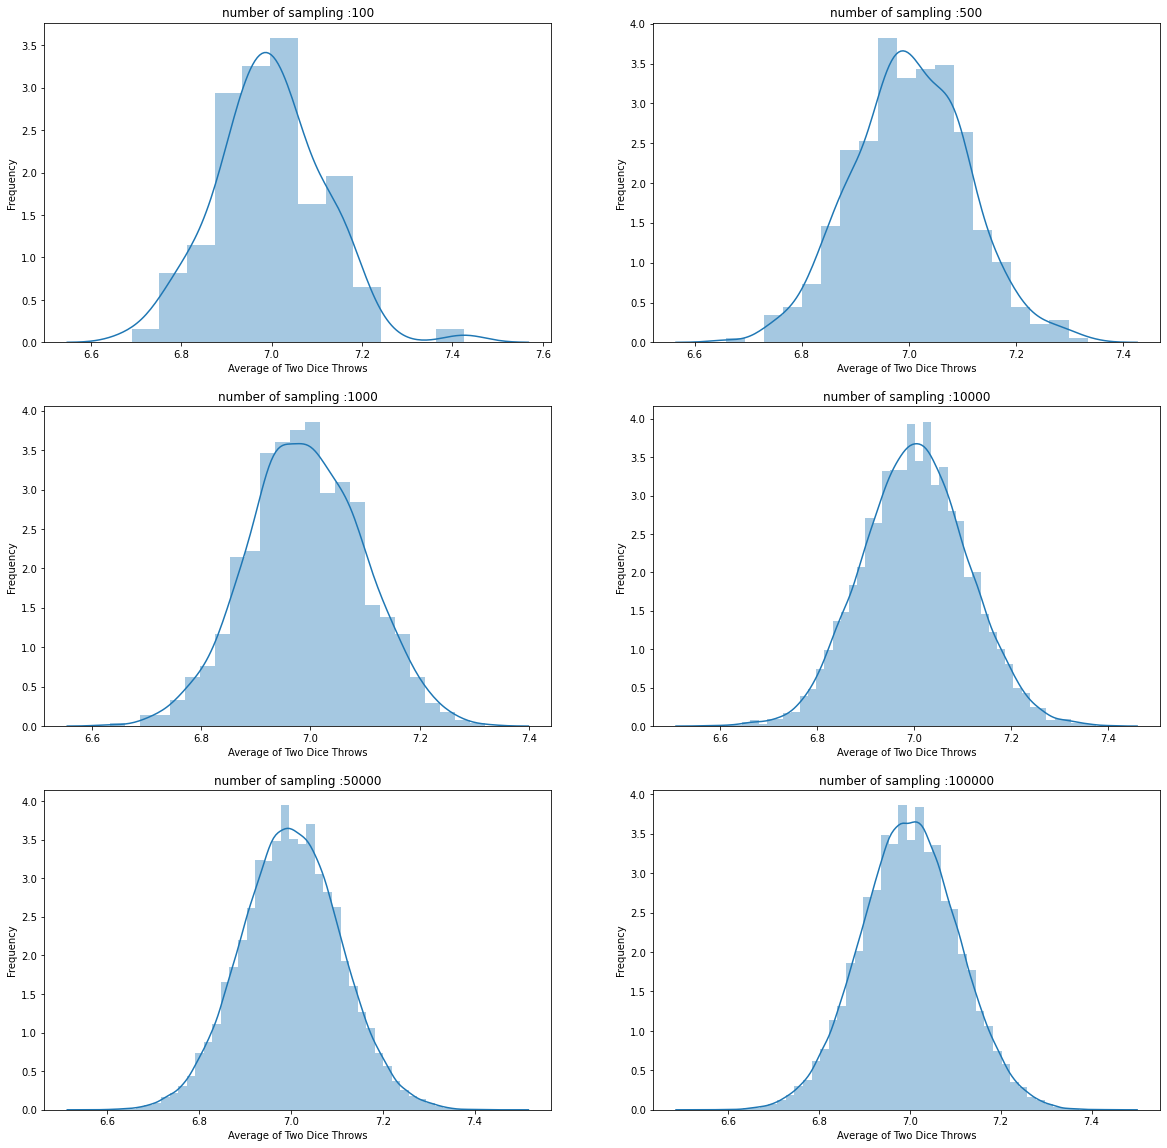

In [8]:
# number of throws
num_throws_per_experiment = 500

#### Note: Show that Increasing Number of Throws (increasing sample size n) converge to normality faster

# list to keep track of all experiments
meansample = []
# for each number of experiments
for i in num_of_experiments:

    # collect mean of each sample
    eachmeansample = []

    # for each sampling
    for j in range(0, i):

        # create a random choice of two die rolls with replacement.
        rc1 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        rc2 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        two_dice = [x + y for x, y in zip(rc1, rc2)]

        # collect mean of each sample
        eachmeansample.append(np.mean(two_dice))

    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        # ax[i, j].hist(meansample[n], density=True)
        sns.distplot(meansample[n], kde=True, ax=ax[i, j])
        ax[i, j].set_title(label="number of sampling :" + str(num_of_experiments[n]))
        ax[i, j].set_xlabel("Average of Two Dice Throws")
        ax[i, j].set_ylabel("Frequency")
        n += 1

/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gurug/opt/anaconda3/envs/beta/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

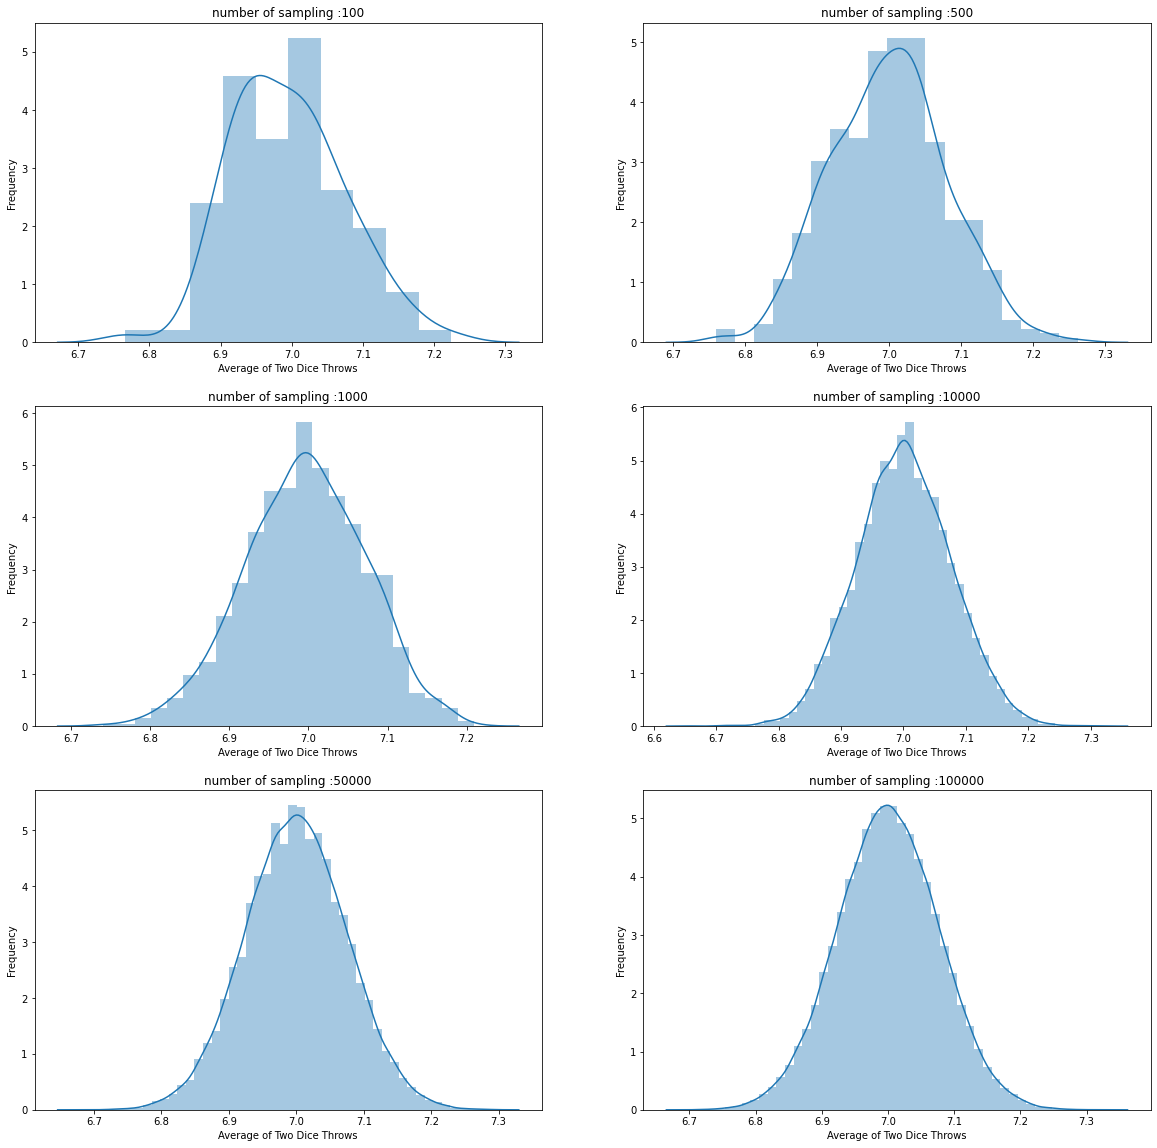

In [9]:
# number of throws
num_throws_per_experiment = 1000

#### Note: Show that Increasing Number of Throws (increasing sample size n) converge to normality faster

# list to keep track of all experiments
meansample = []
# for each number of experiments
for i in num_of_experiments:

    # collect mean of each sample
    eachmeansample = []

    # for each sampling
    for j in range(0, i):

        # create a random choice of two die rolls with replacement.
        rc1 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        rc2 = [get_dice_throw(num_of_faces) for _ in range(num_throws_per_experiment)]
        two_dice = [x + y for x, y in zip(rc1, rc2)]

        # collect mean of each sample
        eachmeansample.append(np.mean(two_dice))

    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        # ax[i, j].hist(meansample[n], density=True)
        sns.distplot(meansample[n], kde=True, ax=ax[i, j])
        ax[i, j].set_title(label="number of sampling :" + str(num_of_experiments[n]))
        ax[i, j].set_xlabel("Average of Two Dice Throws")
        ax[i, j].set_ylabel("Frequency")
        n += 1

# Conclusion

1. As the **number of experiments** is larger, the sample mean distribution gets closer to normal distribution.
2. As the **number of sample size** is bigger, the sample mean distribution gets closer to normal distribution.
3. The minimum sample size matters: only a sample size of at least 30 can ensure the mean likely follows the normal distribution.